# Make prediction and model explain
We use the trained model to predict the test data set and output the prediction results for subsequent data analysis

#1 Load Library

install Captum

In [1]:
!pip install git+https://github.com/pytorch/captum.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
from google.colab import drive
drive.mount('/content/drive')

repo = "/content/drive/MyDrive/Dissertation/MyWork/Dataset/" #will be useful to loop over the files later on.

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import torchvision.models.segmentation
import torch
import torchvision.transforms as tf
from torchvision import transforms, datasets, models
from PIL import Image


In [ ]:
from captum.attr import visualization as viz
from captum.attr import LayerGradCam, FeatureAblation, LayerActivation, LayerAttribution

# 2 Test with single image

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 97.4MB/s]


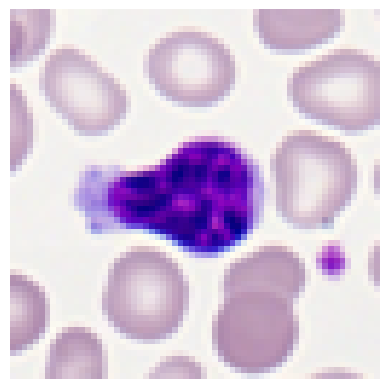

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


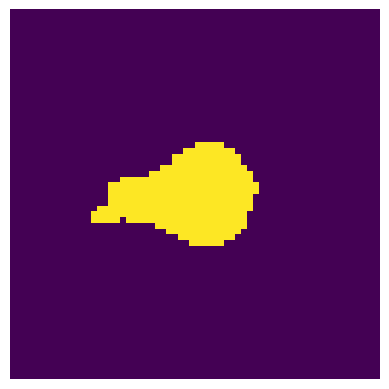

In [4]:
# Path to trained model
modelPath = "/content/drive/MyDrive/Dissertation/MyWork/Dataset/weight.torch"
imagePath = repo + "TestBC/Sample_9591.tiff"  # Test image

height = width = 900
transformImg = tf.Compose([tf.ToPILImage(), tf.Resize((height, width)), tf.ToTensor(), tf.Normalize(
    (0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])  # tf.Resize((300,600)),tf.RandomRotation(145)])#


device = torch.device('cuda') if torch.cuda.is_available() else torch.device(
    'cpu')  # Check if there is GPU if not set trainning to CPU (very slow)


Net = torchvision.models.segmentation.deeplabv3_resnet50(
    pretrained=True)  # Load net
Net.classifier[4] = torch.nn.Conv2d(256, 2, kernel_size=(
    1, 1), stride=(1, 1))  # Change final layer to 2 classes
Net = Net.to(device)  # Set net to GPU or CPU
Net.load_state_dict(torch.load(modelPath))  # Load trained model
Net.eval()  # Set to evaluation mode


Img = cv2.imread(imagePath)  # load test image
height_orgin, widh_orgin, d = Img.shape  # Get image original size
plt.axis('off')
plt.imshow(Img[:, :, ::-1])  # Show image
plt.show()


Img = transformImg(Img)  # Transform to pytorch
Img = torch.autograd.Variable(Img, requires_grad=False).to(device).unsqueeze(0)
with torch.no_grad():
    Prd = Net(Img)['out']  # Run net
Prd = tf.Resize((height_orgin, widh_orgin))(Prd[0])  # Resize to origninal size
seg = torch.argmax(Prd, 0).cpu().detach().numpy()  # Get  prediction classes
plt.axis('off')
plt.imshow(seg)  # display image
plt.show()


Save all predictions for the training dataset

In [ ]:
modelPath = "/content/drive/MyDrive/Dissertation/MyWork/Dataset/weight.torch"
height = width = 900
transformImg = tf.Compose([tf.ToPILImage(), tf.Resize((height, width)), tf.ToTensor(), tf.Normalize(
    (0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])  # tf.Resize((300,600)),tf.RandomRotation(145)])#
device = torch.device('cuda') if torch.cuda.is_available() else torch.device(
    'cpu')  # Check if there is GPU if not set trainning to CPU (very slow)

Net = torchvision.models.segmentation.deeplabv3_resnet50(
    pretrained=True)  # Load net
Net.classifier[4] = torch.nn.Conv2d(256, 2, kernel_size=(
    1, 1), stride=(1, 1))  # Change final layer to 2 classes
Net = Net.to(device)  # Set net to GPU or CPU
Net.load_state_dict(torch.load(modelPath))  # Load trained model
Net.eval()  # Set to evaluation mode



In [ ]:
imageFolder = repo + "TestBC/"
preFolder = repo + "TestPRE/"
for num in range(9001, 10001):
    image_test = imageFolder + "Sample_" + str(num) + ".tiff"
    Img = cv2.imread(image_test)
    Img = transformImg(Img)  # Transform to pytorch
    Img = torch.autograd.Variable(Img, requires_grad=False).to(device).unsqueeze(0)

    with torch.no_grad():
        Prd = Net(Img)['out']  # Run net
    Prd = tf.Resize((height_orgin, widh_orgin))(Prd[0])  # Resize to origninal size
    seg = torch.argmax(Prd, 0).cpu().detach().numpy()  # Get  prediction classes

    img_prediction = Image.fromarray((seg * 255).astype(np.uint8))
    pre_filename = "Sample_" + str(num) + "_pre.png"
    img_prediction.save(preFolder + pre_filename)

    print(str(num) + ")" + pre_filename + 'is done。')


9001)Sample_9001_pre.pngis done。
9002)Sample_9002_pre.pngis done。
9003)Sample_9003_pre.pngis done。
9004)Sample_9004_pre.pngis done。
9005)Sample_9005_pre.pngis done。
9006)Sample_9006_pre.pngis done。
9007)Sample_9007_pre.pngis done。
9008)Sample_9008_pre.pngis done。
9009)Sample_9009_pre.pngis done。
9010)Sample_9010_pre.pngis done。
9011)Sample_9011_pre.pngis done。
9012)Sample_9012_pre.pngis done。
9013)Sample_9013_pre.pngis done。
9014)Sample_9014_pre.pngis done。
9015)Sample_9015_pre.pngis done。
9016)Sample_9016_pre.pngis done。
9017)Sample_9017_pre.pngis done。
9018)Sample_9018_pre.pngis done。
9019)Sample_9019_pre.pngis done。
9020)Sample_9020_pre.pngis done。
9021)Sample_9021_pre.pngis done。
9022)Sample_9022_pre.pngis done。
9023)Sample_9023_pre.pngis done。
9024)Sample_9024_pre.pngis done。
9025)Sample_9025_pre.pngis done。
9026)Sample_9026_pre.pngis done。
9027)Sample_9027_pre.pngis done。
9028)Sample_9028_pre.pngis done。
9029)Sample_9029_pre.pngis done。
9030)Sample_9030_pre.pngis done。
9031)Sampl

#3 Model explain

explain model with 1 image

In [7]:
# Input preprocessing transformation
height=width=900
preprocessing = transforms.Compose([tf.Resize((height, width)),
                                    tf.ToTensor()])
normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])


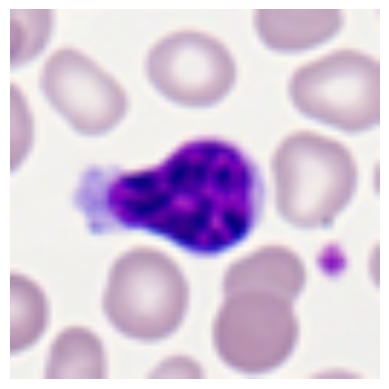

In [8]:
# convert tiff file to jpg
img_exp = Image.open(repo + "TestBC/Sample_" + str(9591) + ".tiff")
jpg_img = Image.new("RGB", img_exp.size)

jpg_img.paste(img_exp)
preproc_img = preprocessing(jpg_img)
plt.imshow(preproc_img.permute(1,2,0)); plt.axis('off'); plt.show()


In [9]:
# This method allows us to visualize a particular segmentation output, by setting
# each pixels color according to the given segmentation class provided in the
# image (segmentation output).
def decode_segmap(image, nc=2):
    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1= stained cell
               (0, 128, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

In [10]:
# Normalize image and compute segmentation output
normalized_inp = normalize(preproc_img).unsqueeze(0).to(device)
normalized_inp.requires_grad = True
out = Net(normalized_inp)['out']

# Find most likely segmentation class for each pixel.
out_max = torch.argmax(out, dim=1, keepdim=True)

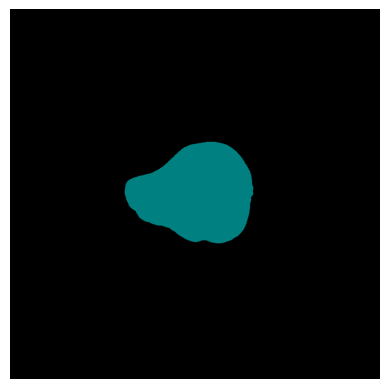

In [11]:
# Visualize segmentation output using utility method.
rgb = decode_segmap(out_max.detach().cpu().squeeze().numpy())
plt.imshow(rgb)
plt.axis('off')
plt.show()

In [12]:
"""
This wrapper computes the segmentation model output and sums the pixel scores for
all pixels predicted as each class, returning a tensor with a single value for
each class. This makes it easier to attribute with respect to a single output
scalar, as opposed to an individual pixel output attribution.
"""
def agg_segmentation_wrapper(inp):
    model_out = Net(inp)['out']
    # Creates binary matrix with 1 for original argmax class for each pixel
    # and 0 otherwise. Note that this may change when the input is ablated
    # so we use the original argmax predicted above, out_max.
    selected_inds = torch.zeros_like(model_out[0:1]).scatter_(1, out_max, 1)
    return (model_out * selected_inds).sum(dim=(2,3))


In [13]:
lgc = LayerGradCam(agg_segmentation_wrapper, Net.backbone.layer4[2].conv3)
gc_attr = lgc.attribute(normalized_inp, target=1)

In [14]:
la = LayerActivation(agg_segmentation_wrapper, Net.backbone.layer4[2].conv3)
activation = la.attribute(normalized_inp)
print("Input Shape:", normalized_inp.shape)
print("Layer Activation Shape:", activation.shape)
print("Layer GradCAM Shape:", gc_attr.shape)

Input Shape: torch.Size([1, 3, 900, 900])
Layer Activation Shape: torch.Size([1, 2048, 113, 113])
Layer GradCAM Shape: torch.Size([1, 1, 113, 113])


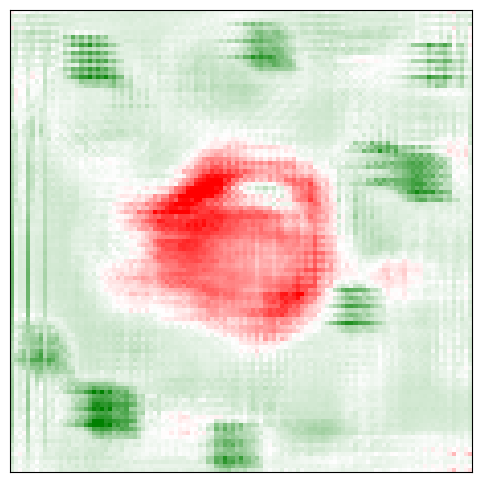

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [15]:
viz.visualize_image_attr(gc_attr[0].cpu().permute(1,2,0).detach().numpy(),sign="all")

In [17]:
upsampled_gc_attr = LayerAttribution.interpolate(gc_attr,normalized_inp.shape[2:])
print("Upsampled Shape:",upsampled_gc_attr.shape)

Upsampled Shape: torch.Size([1, 1, 900, 900])


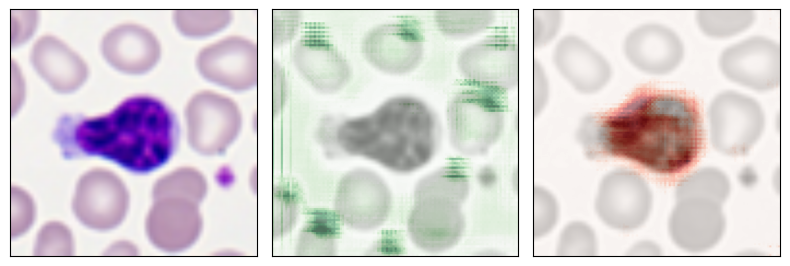

(<Figure size 800x600 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

In [18]:
viz.visualize_image_attr_multiple(upsampled_gc_attr[0].cpu().permute(1,2,0).detach().numpy(),
                                  original_image=preproc_img.permute(1,2,0).numpy(),
                                  signs=["all", "positive", "negative"],
                                  methods=["original_image", "blended_heat_map","blended_heat_map"])